In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('online_retail.xlsx',na_values=['Missing'])


In [3]:
# convert InvoiceDate column to a date_time data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [4]:
#set InvoiceDate column to the index
df = df.set_index('InvoiceDate')

In [5]:
# Deleting rows with null customerID will do as the 1455 is in it.
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1455
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [7]:
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 11:52:00,536414,22139,NaN,56,0.0,NaN,United Kingdom
2010-12-01 14:32:00,536545,21134,NaN,1,0.0,NaN,United Kingdom
2010-12-01 14:33:00,536546,22145,NaN,1,0.0,NaN,United Kingdom
2010-12-01 14:33:00,536547,37509,NaN,1,0.0,NaN,United Kingdom
2010-12-01 14:34:00,536549,85226A,NaN,1,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...
2011-12-07 18:26:00,581199,84581,NaN,-2,0.0,NaN,United Kingdom
2011-12-07 18:31:00,581203,23406,NaN,15,0.0,NaN,United Kingdom
2011-12-07 18:35:00,581209,21620,NaN,6,0.0,NaN,United Kingdom


In [8]:
# null in 'Description' -> null in 'CustomerID'
df = df.dropna(axis = 0,how='any')
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:

# removing columns with negative quantitiy values
df[df['Quantity'] < 0]
df.drop(df[df['Quantity'] <= 0].index,inplace=True)

In [10]:
len(df)

383613

1. Unspecified value in country column
2. 

In [11]:
# make Description to be lowercased, normalisation
df['Description'] = df['Description'].astype('str')
df['Description'] = df['Description'].apply(lambda x : x.lower())

In [12]:
# Index to be only Data, time is splitted into a new column
df['Date'] = pd.to_datetime(df.index.date)
df['Datetime'] = df.index
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)



# convert time to timedelta
from datetime import timedelta

def time_to_timedelta(t):
    return timedelta(hours=t.hour, minutes=t.minute)

# df['Time'] = df['Time'].apply(time_to_timedelta)

In [13]:
# Check for cancellation order
tes = df['InvoiceNo'].astype('str')
print('Number of Order Cancellation: ',len(tes[tes.str.startswith('c')]))

Number of Order Cancellation:  0


In [14]:
# Create Price
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Datetime,TotalPrice
Date,,,,,,,,,
2010-12-01,536365,85123A,white hanging heart t-light holder,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
2010-12-01,536365,71053,white metal lantern,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01,536365,84406B,cream cupid hearts coat hanger,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
2010-12-01,536365,84029G,knitted union flag hot water bottle,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01,536365,84029E,red woolly hottie white heart.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


### What is the KPI/business metric for online retail
1. Revenue
2. Sales Growth Rate Monthly
3. Customer Purchase Cycle
4. Churn/Retention Rate Monthly
5. Average Order Value
6. Cancellation Rate

<Axes: xlabel='Date'>

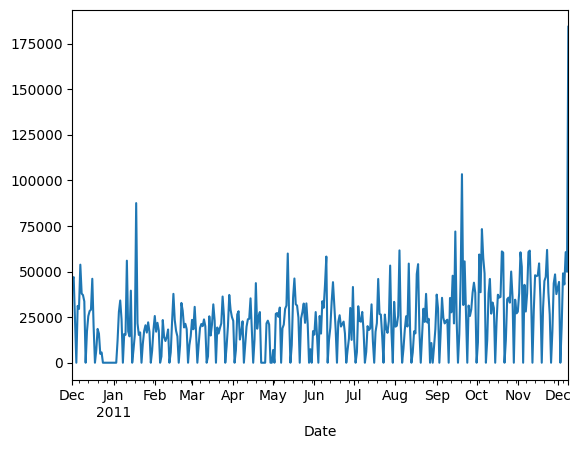

In [15]:
daily_revenue = df['TotalPrice'].resample('D').sum()
daily_revenue.fillna(0)
%matplotlib inline
daily_revenue.plot()


<Axes: xlabel='Date'>

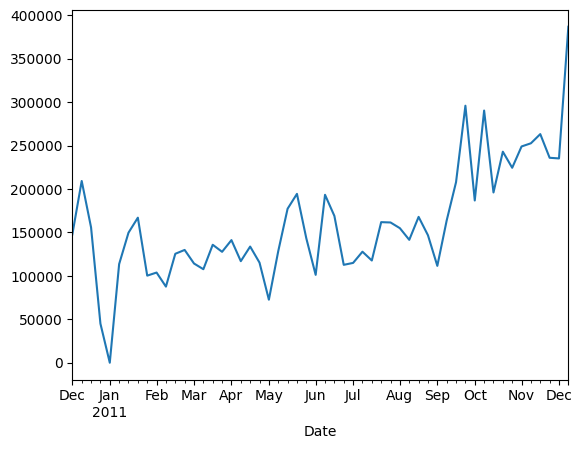

In [16]:
weekly_revenue = df['TotalPrice'].resample('W').sum()
weekly_revenue.plot()

C:\Users\User\AppData\Local\Temp\ipykernel_4276\1942243258.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df['TotalPrice'].resample('M').sum()


<Axes: xlabel='Date'>

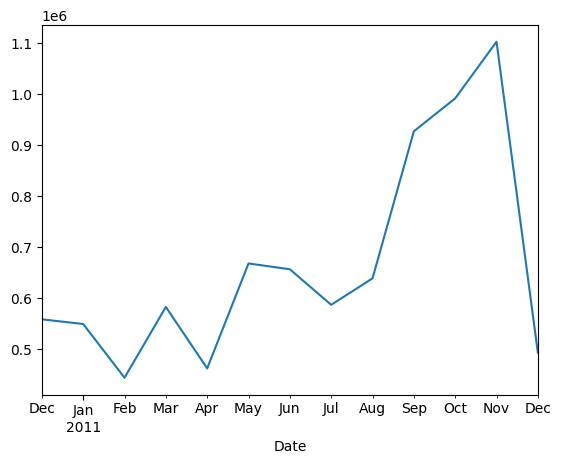

In [17]:
monthly_revenue = df['TotalPrice'].resample('M').sum()
monthly_revenue.plot()

In [18]:
# Calculate the monthly revenue growth rate
monthly_growth_rate = monthly_revenue.pct_change() * 100
monthly_growth_rate = monthly_growth_rate.fillna(0)
# Display the growth rate
print(monthly_growth_rate)


Date
2010-12-31     0.000000
2011-01-31    -1.651236
2011-02-28   -19.237503
2011-03-31    31.381994
2011-04-30   -20.741546
2011-05-31    44.694979
2011-06-30    -1.706723
2011-07-31   -10.647102
2011-08-31     8.865794
2011-09-30    45.274850
2011-10-31     6.973352
2011-11-30    11.221537
2011-12-31   -55.370560
Freq: ME, Name: TotalPrice, dtype: float64


In [19]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Datetime,TotalPrice
Date,,,,,,,,,
2010-12-01,536365,85123A,white hanging heart t-light holder,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
2010-12-01,536365,71053,white metal lantern,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01,536365,84406B,cream cupid hearts coat hanger,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
2010-12-01,536365,84029G,knitted union flag hot water bottle,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01,536365,84029E,red woolly hottie white heart.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01,536365,22752,set 7 babushka nesting boxes,2,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
2010-12-01,536365,21730,glass star frosted t-light holder,6,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,25.50
2010-12-01,536366,22633,hand warmer union jack,6,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
2010-12-01,536366,22632,hand warmer red polka dot,6,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10


In [20]:
# Customer Purchase Cycle : average time it takes for a visitor to make a purchase after first visit

from datetime import timedelta

customer = df.groupby('CustomerID')['Datetime']

npt = {}
for x in df['CustomerID'].drop_duplicates():                    # CustomerID without dupes
    temp = (customer.get_group(x).drop_duplicates())            # same date and time => its in the same order/transaction/invoice
    if len(temp) > 1:
        timediff = temp.iloc[1] - temp.iloc[0]
        npt[x] = timediff
    else:
        npt[x] = timedelta(0)

npt = pd.Series(npt)
npt


17850.0     0 days 00:02:00
13047.0     0 days 00:01:00
12583.0    37 days 03:22:00
13748.0   127 days 01:13:00
15100.0     7 days 03:00:00
                 ...       
13436.0     0 days 00:00:00
15520.0     0 days 00:00:00
13298.0     0 days 00:00:00
14569.0     0 days 00:00:00
12713.0     0 days 00:00:00
Length: 4300, dtype: timedelta64[ns]

In [21]:
# map the series back to original dataframe
df['NextPurchaseTime'] = df['CustomerID'].map(npt)

In [22]:
# calculate next purchase time here, npt is used because calculated based in unique customerid
customer_purchase_cycle = (npt.mean())
customer_purchase_cycle

Timedelta('49 days 22:13:34.409302325')

In [23]:
# Average Order Value
monthly_revenue
monthly_unique_order = df['InvoiceNo'].resample('ME').nunique()
monthly_aov = monthly_revenue/monthly_unique_order
monthly_aov

Date
2010-12-31    413.577902
2011-01-31    572.162742
2011-02-28    451.269969
2011-03-31    452.733678
2011-04-30    408.728973
2011-05-31    436.406686
2011-06-30    476.966860
2011-07-31    450.406137
2011-08-31    504.281485
2011-09-30    539.851119
2011-10-31    531.978322
2011-11-30    429.701277
2011-12-31    652.283139
Freq: ME, dtype: float64

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Datetime,TotalPrice,NextPurchaseTime
Date,,,,,,,,,,
2010-12-01,536365,85123A,white hanging heart t-light holder,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,0 days 00:02:00
2010-12-01,536365,71053,white metal lantern,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0 days 00:02:00
2010-12-01,536365,84406B,cream cupid hearts coat hanger,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,0 days 00:02:00
2010-12-01,536365,84029G,knitted union flag hot water bottle,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0 days 00:02:00
2010-12-01,536365,84029E,red woolly hottie white heart.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0 days 00:02:00


In [25]:
country_groups = df.groupby('Country')
country_groups['TotalPrice'].sum().sort_values(ascending= False)

Country
United Kingdom          7093898.284
Netherlands              279914.120
EIRE                     260872.090
Germany                  225610.070
France                   196835.310
Australia                138446.310
Spain                     58159.990
Switzerland               55339.310
Belgium                   40826.610
Japan                     37400.320
Norway                    36165.440
Portugal                  33439.890
Sweden                    32843.370
Finland                   22381.360
Channel Islands           20450.440
Singapore                 19226.220
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Iceland                    4310.000
Greece                     4079.530
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [26]:
df.to_csv('cleaned.csv')

In [27]:
%store -r rfm

In [28]:
df = pd.merge(df,rfm,on='CustomerID',how= 'left')

In [29]:
df['Segment'].value_counts()

Segment
Champions              236017
Loyal Customers         70878
Need Attention          36256
At Risk                 24153
Lost                    11039
Potential Loyalists      5270
Name: count, dtype: int64

In [30]:
# df.to_csv('cleaned+rfm.csv')